# Assignment 1 - Statistics

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Sources:

- Original owners: National Institute of Diabetes and Digestive and Kidney Diseases
- Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu) Research Center, RMI Group Leader Applied Physics Laboratory The Johns Hopkins University Johns Hopkins Road Laurel, MD 20707 (301) 953-6231 (c) Date received: 9 May 1990

Past Usage:
- Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \& Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In {\it Proceedings of the Symposium on Computer Applications and Medical Care} (pp. 261--265). IEEE Computer Society Press.

The diagnostic, binary-valued variable investigated is whether the patient shows signs of diabetes according to World Health Organization criteria (i.e., if the 2 hour post-load plasma glucose was at least 200 mg/dl at any survey examination or if found during routine medical care). The population lives near Phoenix, Arizona, USA.

1. Define the type of variables that are there in the dataset
2. Draw neat plots (histogram, box-plot, violin plot etc.) to explore each variable. Comment on summary statistics, what distribution variables follow, whether these distributions can be compared to any known distributions, are there any outliers USING PYTHON
3. If there are any variables that follow known distribution, compare distribution of those variables with know distribution through Q-Q plot USING PYTHON
4. Estimate proportion of population (Prima Indian Heritage females > 21) having diabetes, with 95% confidence interval. Give description of the approach. USING PYTHON
5. A claim is made that on an average the females in this age group are obese (i.e. BMI >= 30.0). Test this hypothesis with a 95% confidence level. Give description of the approach.
6. Plot correlation between pairs of variables and comment which variables have a strong correlation. Also, analyse partial correlations and comment on confounding variables. USING PYTHON

# Assignment - 1 (EEDP Data Science Track)

So, First of all we will start with importing the dataset in to the file and checking if the data is accessible over the Jupyter Notebook. We do so using the `pandas` library of the python. For ensuring, this we will display a few rows of the dataset.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Define the type of variables that are there in the dataset

Looking at the dataset description, we can identify the following variables:

Pregnancies: Number of times pregnant (numeric)
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (numeric)
BloodPressure: Diastolic blood pressure (numeric)
SkinThickness: Triceps skin fold thickness (numeric)
Insulin: 2-Hour serum insulin (numeric)
BMI: Body mass index (numeric)
DiabetesPedigreeFunction: Diabetes pedigree function (numeric)
Age: Age (numeric)
Outcome: Class variable (0 or 1) - represents whether a patient has diabetes or not (categorical)
Note: All the numeric variables are continuous.

### Draw neat plots (histogram, box-plot, violin plot etc.) to explore each variable. Comment on summary statistics, what distribution variables follow, whether these distributions can be compared to any known distributions, are there any outliers

For this purpose, in order to draw these graphs we will start by importing 3 of the libraries we will be using to draw these graphs `matplotlib` and `seaborn`. 

In [4]:
# Importing Nessecary Libraries for plotting th graphs
import matplotlib.pyplot as plt
import seaborn as sns

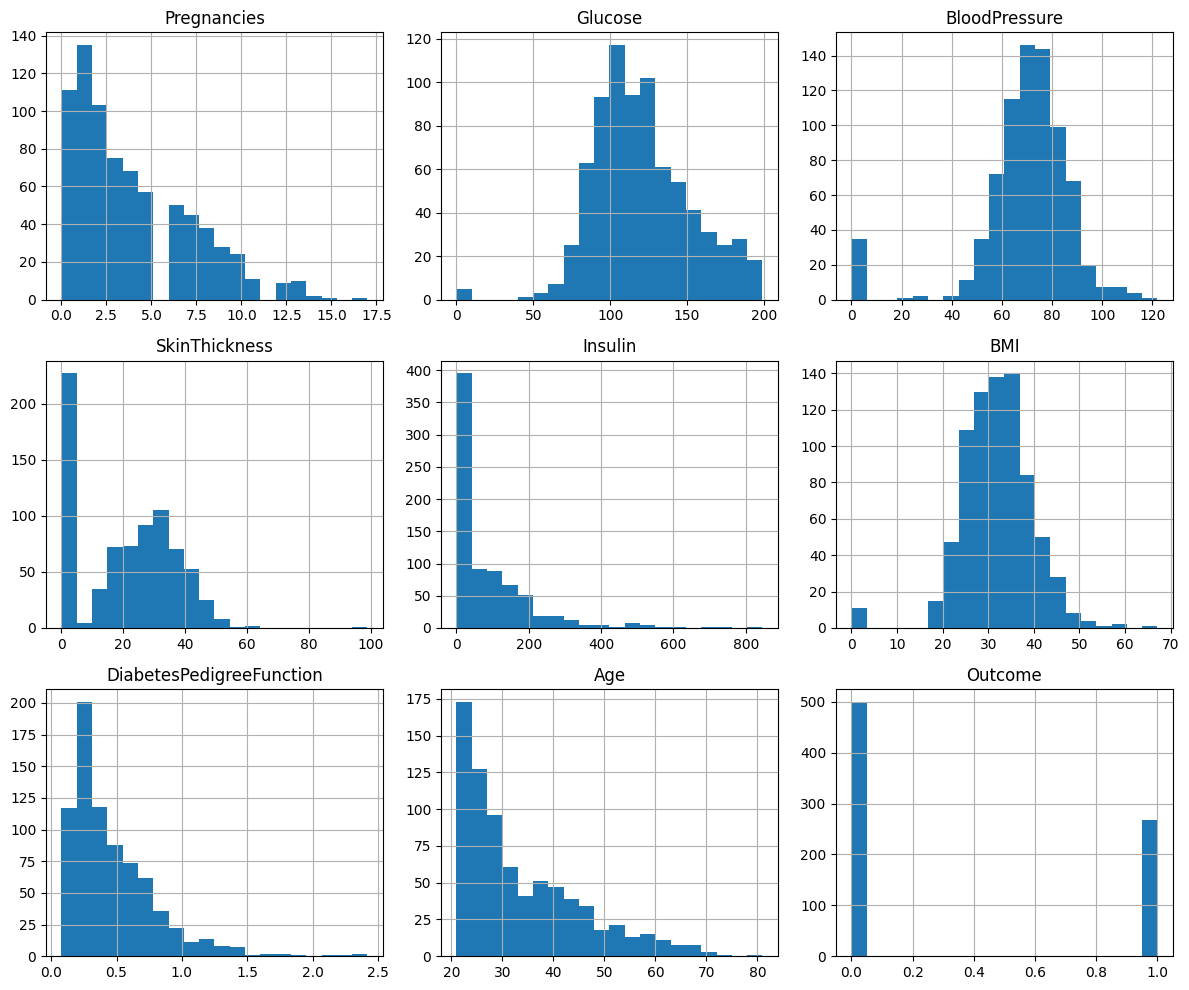

In [5]:
# Histogram for each variable
data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

#### Histogram Analysis

- Pregnancies: Right-skewed, with a higher frequency of lower numbers of pregnancies and decreasing frequency as the number of pregnancies increases.
- Glucose: Unimodal, and has a symmetrical shape
- Blood Pressure: Unimodal, and has a symmetrical shape (but slighty right-skewed)
- SkinThickness: Right-skewed, with a higher frequency of lower skin thickness values and decreasing frequency as the thickness increases.
- Insulin: Right-skewed, with a higher frequency of lower insulin values and decreasing frequency as the insulin levels increase.
- BMI: Unimodal, and has a symmetrical shape
- DiabetesPedigreeFunction:  Right-skewed, with a higher frequency of lower pedigree function values and decreasing frequency as the values increase.
- Age: Right-skewed, with a higher frequency of younger ages and decreasing frequency as the age increases.

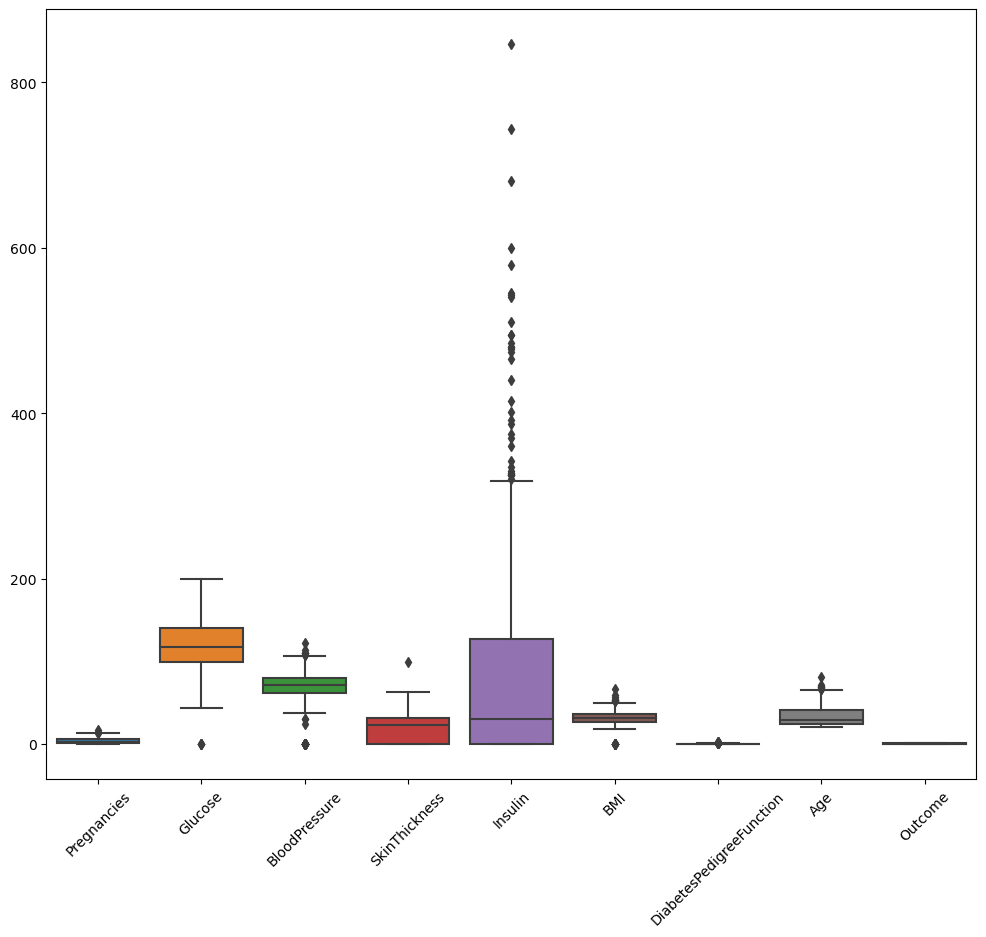

In [6]:
# Box plots for each variable
plt.figure(figsize=(12, 10))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

#### Box Plot Analysis

`Pregnancies` and `Outcome`, do not have outliers, as indicated by the absence of points beyond the whiskers.
`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, and `Age` have outliers, with points extending beyond the whiskers.

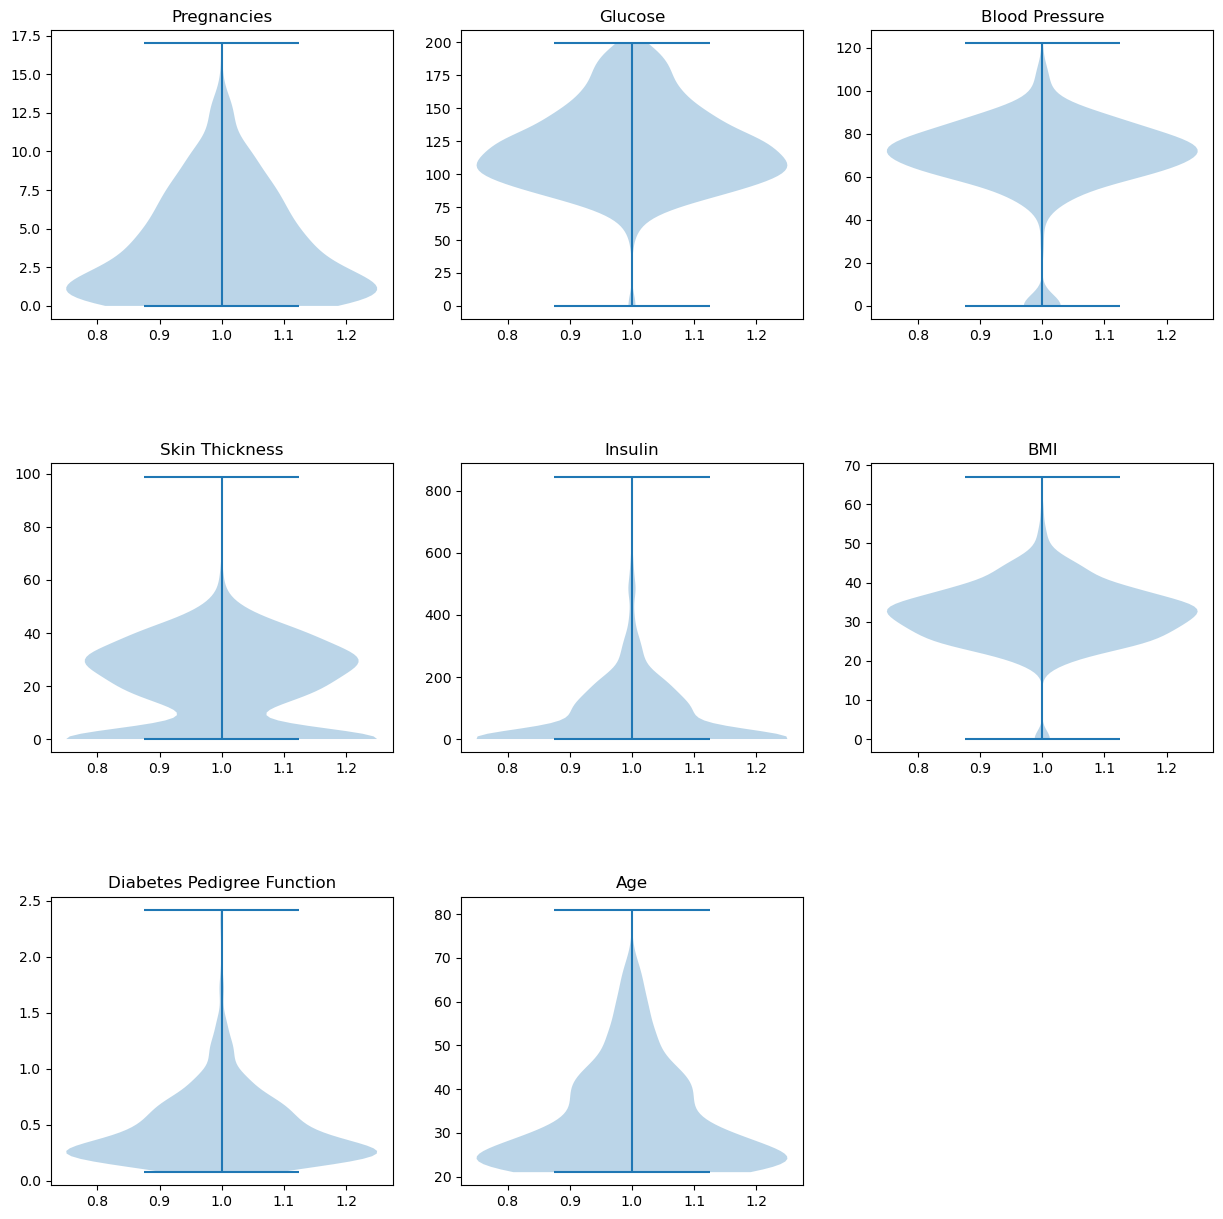

In [20]:
# Violin plots for each variable

fig, axs = plt.subplots(3,3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

# Violin plots
axs[0, 0].violinplot(data['Pregnancies'])
axs[0, 0].set_title('Pregnancies')

axs[0, 1].violinplot(data['Glucose'])
axs[0, 1].set_title('Glucose')

axs[0, 2].violinplot(data['BloodPressure'])
axs[0, 2].set_title('Blood Pressure')

axs[1, 0].violinplot(data['SkinThickness'])
axs[1, 0].set_title('Skin Thickness')

axs[1, 1].violinplot(data['Insulin'])
axs[1, 1].set_title('Insulin')

axs[1, 2].violinplot(data['BMI'])
axs[1, 2].set_title('BMI')

axs[2, 0].violinplot(data['DiabetesPedigreeFunction'])
axs[2, 0].set_title('Diabetes Pedigree Function')

axs[2, 1].violinplot(data['Age'])
axs[2, 1].set_title('Age')

fig.delaxes(axs[2, 2])

#### Violin Plot Analysis

`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, and `Age` show multiple peaks or modes in their distribution, suggesting the presence of distinct subgroups or clusters.

In [8]:
import scipy.stats as stats
import numpy as np

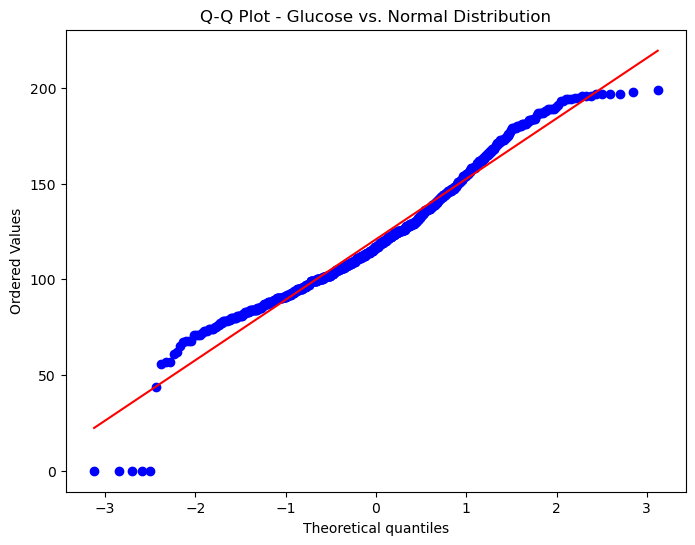

In [9]:
# Q-Q plot for 'Glucose' variable against normal distribution
plt.figure(figsize=(8, 6))
stats.probplot(data['Glucose'], dist='norm', plot=plt)
plt.title("Q-Q Plot - Glucose vs. Normal Distribution")
plt.show()

#### Q-Q Plot Analysis

- By comparing the data points on the Q-Q plot to the diagonal line, we can assess whether the 'Glucose' variable follows a normal distribution. If the data points closely follow the line, it suggests that the 'Glucose' variable is normally distributed. Deviations from the line indicate deviations from normality.

- The direction and pattern of deviations (e.g., points falling below or above the line) can provide insights into the specific nature of the departure from normality.

In [10]:
# Filter the dataset for Pima Indian Heritage females > 21
population = data[(data['Age'] > 21) & (data['Outcome'] == 1)]

# Calculate the sample proportion
sample_proportion = len(population) / len(data)

# Calculate the standard error
standard_error = np.sqrt(sample_proportion * (1 - sample_proportion) / len(data))

# Calculate the confidence interval (assuming normal approximation)
confidence_interval = stats.norm.interval(0.95, loc=sample_proportion, scale=standard_error)

# Print the results
print(f"Proportion of population with diabetes: {sample_proportion:.4f}")
print(f"95% Confidence Interval: {confidence_interval}")


Proportion of population with diabetes: 0.3424
95% Confidence Interval: (0.3088873083449713, 0.37600852498836207)


So, in order to get the proportion of population(Prima Indian Heritage Females > 21) having diabetes, with 95% confidence intrval, we start by filtering our database first, so that we only consider the population that is relevant to us. Than we calculate the proportion of females in the dataset who have diabetes(Outcome = 1). This will serve as a estimate for population proportion.

Calculate the standard error. Standard error is variability of sample proportion estimate and can be calculated using the formula √(p*(1-p)/n), where p is the sample proportion and n is the sample size.

After, this calculate the confidence interval around the sample interval to provide a ransge of plausible values for the population proportion. For, 95% confidence level, we will use z-distribution and calculate the confidence interval as  p ± z*SE. Where z is the critica value for a 95% confidence level and SE is the Standad Error.

In [11]:
# Filter the dataset for females in the given age group
female_age_group = data[data['Age'] > 21]

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(female_age_group['BMI'], 30.0)

# Print the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 8.1864
P-value: 0.0000


To teest the claim that, on average, females in the given group range a re obese (BMI ≥ 30.0), we will perform a hypothesis test on the given dataset. 

- We start by defining the null and alternative hypothesis.
  - Null Hypothesis: The average BMI of females in the age group is not greater than or equal to 30.0.
  - Alternative Hypothesis: The Average BMI of females in the age group is greater than or equal to 30.0.
- Now, set the significance level (α) of 0.05 which corresponds to 95% confidence level.
- Now, we perform the hypothesis test by calculating the sample mean and sample standard deviation of BMI for the females in the given age group.
- Use a one sample t-test to assess if the mean of a sample significantly differs from a hypothesized value.
- Calculate the test statistic and the p-value associated with the test statistic.

Now, we need to check if the p-value is less than the significance value(α), reject the null hypothesis and conclude that the average BMI of females in the age group is greater than or equal to 30.0. If not so and, the p-value comes out to be greater than or equal to significance value(α), fail to reject the null hypothesis and conclude that there is not enough evidence to support the claim that the average BMI of females in the age group is greter than or equal to 30.0.

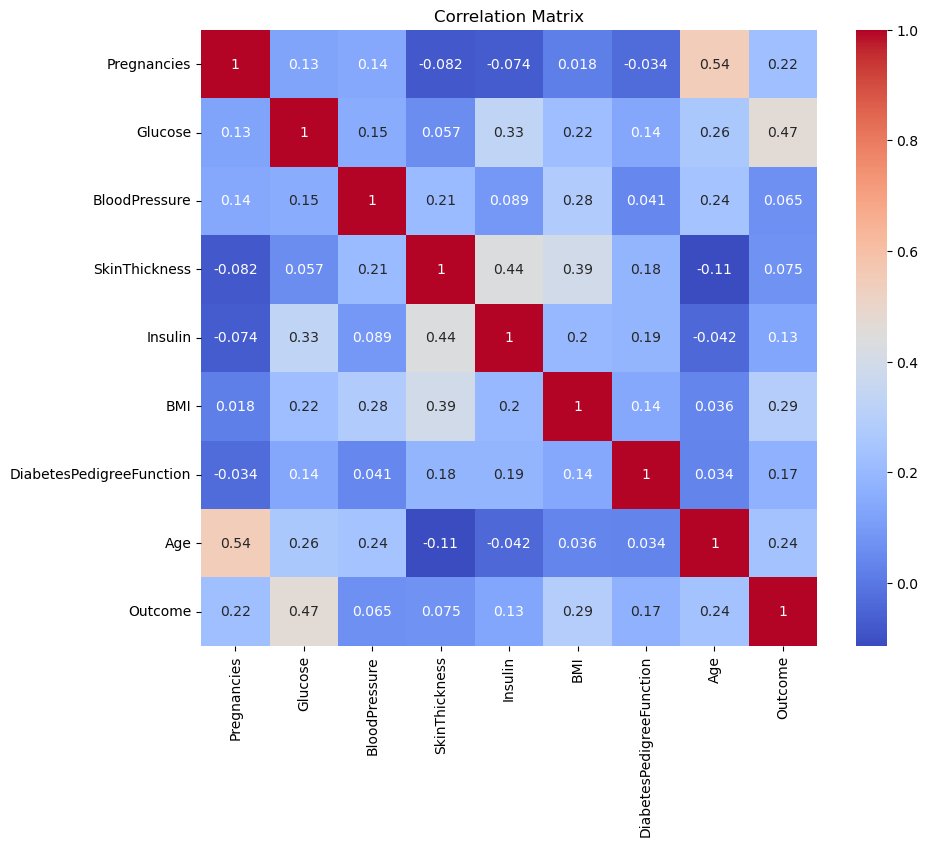

In [12]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In the heatmap, variables with high absolute correlation values (close to 1) or distinct color patterns (dark red or dark blue) indicate strong correlations. Positive correlations are represented by light colors, while negative correlations are represented by dark colors.